In this project, I am going to visualize the Walkability Index of a suburb(Accra) using maps or other graphical representations to understand the spatial distribution of walkability within the suburb.

A secondary purpose of this notebook is to be an introduction to basic Python, the pandas data analytics library and matplotlib.

Importing libraries and technologies needed for the rest of the notebook.

In [3]:
#We don't use seaborn in this particular notebook, but it makes matplotlib charts look nicer.
import seaborn as sns 

import osmnx as ox

import pandas as pd
from pandas import Series,DataFrame

#To display the figures in the notebook itself.
%matplotlib inline

## Data Acquisition
Using the python OSMNX library, I obtain the necessary data from OpenStreetMap (OSM) for the suburb to analyze.

Once the network graph is downloaded, I visualize it using ox.plot_graph(). This will show you the walk network of the specified suburb

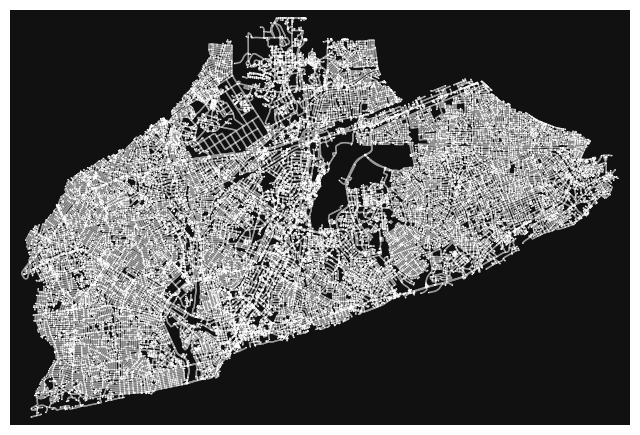

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
suburb_name = "Accra"

graph = ox.graph_from_place(suburb_name, network_type="walk")

ox.plot_graph(graph, node_size=1)

## Data Preparation
Once you have the OSM data, you need to preprocess it to extract the relevant features

### Road Connectivity

In [4]:
import osmnx as ox
import networkx as nx

G = ox.graph_from_place(suburb_name, network_type='all_private')

node_degree = dict(G.degree())  # Calculate node degree for each node


{30729912: 6, 30729918: 6, 30729919: 6, 30729928: 3, 30729945: 4, 30729959: 3, 30729961: 3, 30729968: 3, 30729971: 3, 30729972: 3, 30729974: 8, 30729976: 3, 30729996: 6, 30730003: 4, 30730007: 7, 30730009: 4, 30730019: 7, 30730059: 6, 30730075: 3, 30730113: 6, 30730115: 6, 30730116: 6, 30730118: 6, 30730129: 6, 30730136: 6, 30730138: 6, 30749435: 6, 30749448: 6, 30749460: 6, 30772876: 6, 30772903: 6, 30775651: 6, 30775653: 6, 30776285: 4, 30776306: 6, 30776319: 6, 30776320: 6, 30776321: 6, 30776322: 2, 30776372: 6, 30776400: 6, 30776401: 6, 30776442: 6, 30776444: 6, 30777531: 6, 30777552: 6, 30777559: 6, 30777562: 6, 30777586: 2, 30777587: 6, 30777602: 2, 30777606: 6, 30777661: 6, 30777669: 8, 30777675: 6, 30778381: 6, 30778472: 6, 30778473: 6, 30778476: 6, 30778478: 6, 30778480: 6, 30778482: 6, 30778820: 6, 30778832: 4, 30778835: 4, 30778865: 4, 30936227: 3, 30936231: 4, 30936304: 5, 30936309: 5, 30936355: 8, 30936356: 6, 30936357: 6, 30936359: 4, 30936362: 6, 30936363: 6, 30936368: 6

### Population and Land size Extraction

Accra's 2023 population is now estimated at 2,660,072. In 1950, the population of Accra was 177,147.
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiclvG647P_AhX5T6QEHS3pAp0QFnoECA8QAw&url=https%3A%2F%2Fworldpopulationreview.com%2Fworld-cities%2Faccra-population%23%3A~%3Atext%3DAccra%27s%25202023%2520population%2520is%2520now%2Cthe%2520UN%2520World%2520Urbanization%2520Prospects.&usg=AOvVaw0Z6TXhwFRxBslLYIp8BPZC

In [5]:
population = 2660072
area = 225.7

total_length = sum([data['length'] for u, v, data in G.edges(data=True)])

intersection_nodes = [node for node, degree in G.degree() if degree > 2]

num_intersections = len(intersection_nodes)

print("Total length: {:,}m".format(total_length))
print("Number of intersections: {:,}".format(num_intersections))

road_density = total_length / ( area * 1000**2)  # convert m^2 to km^2 
print("Road density: {:,.3f} km/km^2".format(road_density))


Total length: 6,593,160.413000006m
Number of intersections: 24,079
Road density: 0.029 km/km^2


### Population Density

In [6]:
import prep

# Print the population density of Accra

data_density = prep.calculate_population_density(population, area)

print(data_density)

11785.55604785113


### Land use mix

In [7]:
# Download the OSM data for the suburb
suburb_gdf = ox.geocode_to_gdf(suburb_name)

# Retrieve land use tags for the suburb
land_use_tags = ox.geometries_from_place(suburb_name, tags={"landuse": True})

# Print the land use tags and their frequencies
land_use_counts = land_use_tags["landuse"].value_counts()
print(land_use_counts)

landuse
residential          322
grass                175
commercial            83
industrial            22
cemetery              11
farmland              10
construction          10
religious              7
military               4
dump                   4
forest                 4
government             3
recreation_ground      3
farmyard               2
landfill               2
garages                1
retail                 1
plant_nursery          1
churchyard             1
public_office          1
salt_pond              1
Name: count, dtype: int64


Calculate the proportion of each land use type by dividing the count of each land use category by the total count of land use categories.


In [8]:
# Given land use counts
land_use_counts = {
    'residential': 322,
    'grass': 175,
    'commercial': 83,
    'industrial': 22,
    'cemetery': 11,
    'farmland': 10,
    'construction': 10,
    'religious': 7,
    'military': 4,
    'dump': 4,
    'forest': 4,
    'government': 3,
    'recreation_ground': 3,
    'farmyard': 2,
    'landfill': 2,
    'garages': 1,
    'retail': 1,
    'plant_nursery': 1,
    'churchyard': 1,
    'public_office': 1,
    'salt_pond': 1
}

# Calculate the total count of land use categories
total_count = sum(land_use_counts.values())

# Calculate the proportion of each land use type
land_use_proportions = {land_use: count / total_count for land_use, count in land_use_counts.items()}

import math

# Calculate the Shannon Diversity Index
land_use_mix_value = -sum(proportion * math.log(proportion) for proportion in land_use_proportions.values())

print("Land use mix value: {:.3f}".format(land_use_mix_value))


Land use mix value: 1.549


### Spatial Intersection
Overlay land use mix data with the suburb's boundaries to extract the relevant land use mix within the region. Useing spatial operations like intersection or overlay to identify the land use polygons that fall within the suburb.

In [9]:
from prep import create_land_use_polygons
import geopandas as gpd
from shapely.geometry import Polygon

# Create a DataFrame with land use data
land_use_data = gpd.GeoDataFrame({
    'land_use': ['residential', 'grass', 'commercial', 'industrial', 'cemetery', 'farmland', 'construction', 'religious', 'military', 'dump', 'forest', 'government', 'recreation_ground', 'farmyard', 'landfill', 'garages', 'retail', 'plant_nursery', 'churchyard', 'public_office', 'salt_pond'],
    'count': [322, 175, 83, 22, 11, 10, 10, 7, 4, 4, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1]
})

# Create polygons from land use data (assuming they have geometry coordinates)
land_use_polygons = create_land_use_polygons(land_use_data)

# Create a new DataFrame with the land use polygons
land_use_polygons_df = gpd.GeoDataFrame(land_use_polygons, columns=['land_use', 'geometry'], geometry='geometry')


# Define the geographical coordinates of the suburb's boundary
north = 37.8  # Latitude of the northern edge
south = 37.7  # Latitude of the southern edge
east = 144.98  # Longitude of the eastern edge
west = 144.95  # Longitude of the western edge

# Convert land_use_polygons_df to a GeoDataFrame
land_use_gdf = gpd.GeoDataFrame(land_use_polygons_df, geometry='geometry', crs='EPSG:4326')

# Create a polygon representing the suburb boundary
boundary_coords = [(west, south), (east, south), (east, north), (west, north)]
suburb_boundary = gpd.GeoDataFrame({'geometry': [Polygon(boundary_coords)]}, geometry='geometry', crs='EPSG:4326')

print(isinstance(land_use_gdf, gpd.GeoDataFrame))
print(isinstance(suburb_boundary, gpd.GeoDataFrame))

# Perform the overlay operation
land_use_within_suburb = gpd.overlay(land_use_gdf, suburb_boundary, how='intersection')

True
True


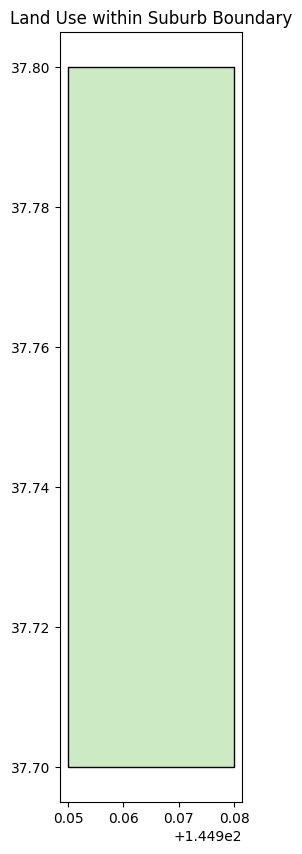

In [10]:
import matplotlib.pyplot as plt

# Plot the land use within the suburb boundary
fig, ax = plt.subplots(figsize=(10, 10))
land_use_within_suburb.plot(ax=ax, column='land_use', cmap='Set3')
suburb_boundary.plot(ax=ax, facecolor='none', edgecolor='black')
plt.title('Land Use within Suburb Boundary')
plt.show()

## Data Integration
Combining the extracted road network, population density, and land use mix data to create a unified dataset that represents the walkability components for area.

### Normalize Components
Normalize each walkability component to a common scale, such as between 0 and 1, to ensure equal weightage during aggregation. This step is important to account for differences in the range and magnitude of the components.

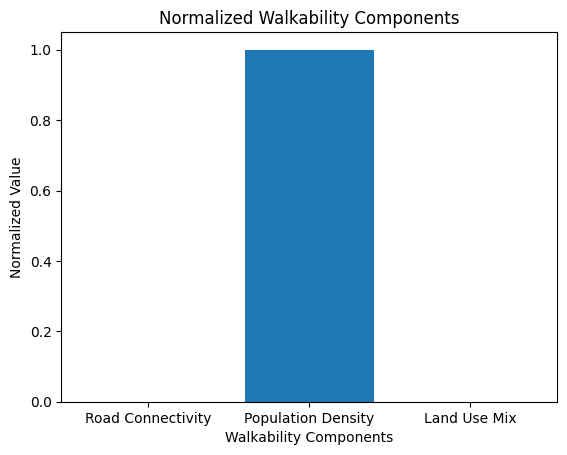

In [49]:
import statistics

def normalize_value(value, min_value, max_value):
    """
    Normalize a single value between 0 and 1 based on the minimum and maximum values.

    Args:
        value: The value to be normalized.
        min_value: The minimum possible value.
        max_value: The maximum possible value.

    Returns:
        The normalized value between 0 and 1.
    """
    normalized_value = (value - min_value) / (max_value - min_value)
    return normalized_value

# Create a dictionary to store the walkability components
walkability_components = {
    'area_id': ["Accra"],
    'road_connectivity': [0.029],
    'population_density': [11785.556],
    'land_use_mix': [1.549]
}
min = walkability_components['road_connectivity'][0]
max = walkability_components['population_density'][0]

# Normalize the components using z-score normalization
road_connectivity_normalized = normalize_value(walkability_components['road_connectivity'][0], min , max)
population_density_normalized = normalize_value(walkability_components['population_density'][0], min , max)
land_use_mix_normalized = normalize_value(walkability_components['land_use_mix'][0], min , max)

# Add normalized components to the dictionary
walkability_components['road_connectivity_normalized'] = road_connectivity_normalized
walkability_components['population_density_normalized'] = population_density_normalized
walkability_components['land_use_mix_normalized'] = land_use_mix_normalized


# Create a list of the normalized values
normalized_values = [
    walkability_components['road_connectivity_normalized'],
    walkability_components['population_density_normalized'],
    walkability_components['land_use_mix_normalized']
]

# Create a list of the corresponding component names
component_names = ['Road Connectivity', 'Population Density', 'Land Use Mix']

# Plot the normalized values as a bar plot
plt.bar(component_names, normalized_values)
plt.xlabel('Walkability Components')
plt.ylabel('Normalized Value')
plt.title('Normalized Walkability Components')
plt.show()


## Aggregating  Walkability 
Index Finally aggregate the Walkability Index values to obtain a single walkability measure for the suburb. This can be done by calculating the average, weighted average, or any other aggregation method suitable for your analysis.

In [44]:
weight_road = 0.8
weight_population = 0.3
weight_land_use = 0.3

road_connectivity_normalized = 0.0
population_density_normalized = 1.0
land_use_mix_normalized = 0.00012897174644799507

walkability_index = (
    road_connectivity_normalized * weight_road +
    population_density_normalized * weight_population +
    land_use_mix_normalized * weight_land_use
)

print("Walkability Index:", walkability_index)

Walkability Index: 0.30003869152393436


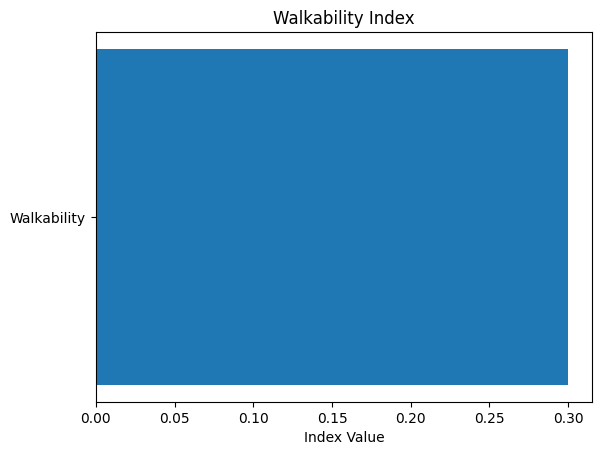

In [45]:
# Define the walkability index value
walkability_index = 0.30003869152393436

# Create a horizontal bar plot
plt.barh(['Walkability'], [walkability_index])

# Set the plot title and axis labels
plt.title('Walkability Index')
plt.xlabel('Index Value')

# Display the plot
plt.show()

# Meta Analysis / Final

A walkability index of [ 0.30003869152393436 ] suggests that the suburb or neighborhood has a moderate level of walkability. This means that it may have some pedestrian-friendly features, such as sidewalks, crosswalks, or local amenities within walking distance. However, there may still be room for improvement in terms of overall walkability.

It's important to note that the interpretation of walkability index values can vary depending on the specific methodology used to calculate the index. Different studies or organizations may use different scales or criteria to determine walkability scores. Therefore, the exact meaning of a specific value may differ in different contexts or systems.